In [1]:
# once i have wholegenome_offset.trees
import pandas as pd

import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os
from collections import defaultdict

In [6]:
path2 = '/home/tbellagio/scratch/slim_grenenet4gen/slim_grenenet/'
path1 = '/home/tbellagio/scratch/slim_grenenet/'

In [10]:
all_pheno = os.listdir(path1 + '/results/' )

In [11]:
all_pheno

['arq_highfreq_fivepoly_lowbeta',
 'arq_mediumfreq_onehpoly_highbeta',
 'arq_lowfreq_onehpoly_lowbeta',
 'arq_mediumfreq_fivepoly_lowbeta',
 'arq_mediumfreq_twentypoly_lowbeta',
 'arq_lowfreq_monogen_highbeta',
 'arq_highfreq_onehpoly_highbeta',
 'arq_mediumfreq_monogen_lowbeta',
 'arq_mediumfreq_twentypoly_highbeta',
 'arq_lowfreq_onehpoly_highbeta',
 'arq_lowfreq_twentypoly_highbeta',
 'arq_mediumfreq_monogen_highbeta',
 'arq_highfreq_twentypoly_lowbeta',
 'arq_highfreq_monogen_highbeta',
 'arq_mediumfreq_onehpoly_lowbeta',
 'arq_lowfreq_fivepoly_lowbeta',
 'arq_mediumfreq_fivepoly_highbeta',
 'arq_highfreq_onehpoly_lowbeta',
 'arq_highfreq_fivepoly_highbeta',
 'arq_highfreq_twentypoly_highbeta',
 'arq_highfreq_monogen_lowbeta',
 'arq_lowfreq_monogen_lowbeta',
 'arq_lowfreq_twentypoly_lowbeta',
 'arq_lowfreq_fivepoly_highbeta']

In [23]:
all_pheno_df_og = pd.DataFrame()

for i in all_pheno[1:]:
    
    phenotypes = pd.read_csv(path1 + 'results/' + i + '/phenotypes.csv').drop('Unnamed: 0',axis=1)
    phenotypes.columns = [i]
    all_pheno_df_og = pd.concat([all_pheno_df_og, phenotypes],axis=1)

<Figure size 2000x2000 with 0 Axes>

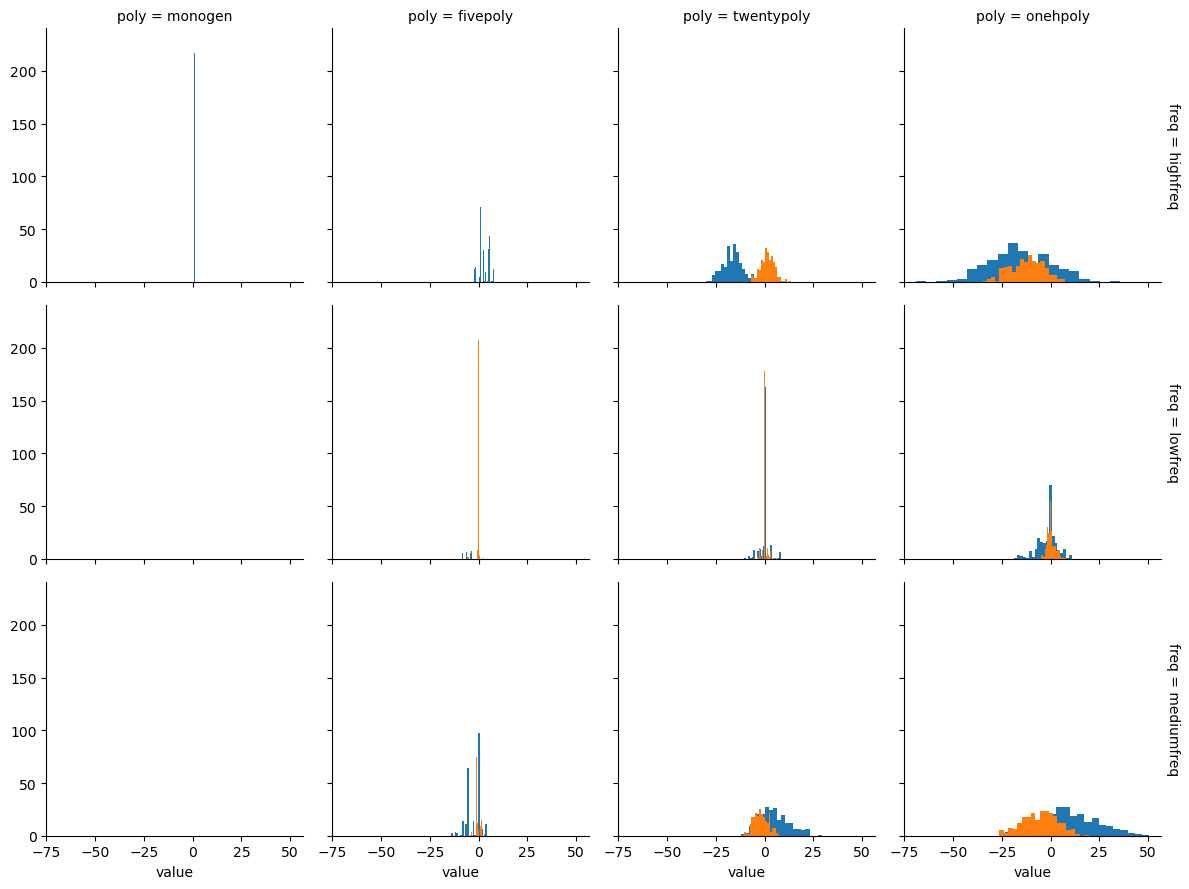

In [36]:
all_pheno_df = all_pheno_df_og.T.reset_index()
all_pheno_df['freq'] = all_pheno_df['index'].str.split('_').str[1]
all_pheno_df['beta'] = all_pheno_df['index'].str.split('_').str[-1]
all_pheno_df['poly'] = all_pheno_df['index'].str.split('_').str[2]
all_pheno_df = all_pheno_df.pivot_table(columns = ['beta','freq', 'poly'],values=all_pheno_df.columns[1:-3])
all_pheno_df = all_pheno_df.melt()

# Define the desired order for rows and columns
row_order = ['lowbeta', 'highbeta']
col_order = ['monogen', 'fivepoly', 'twentypoly', 'onehpoly']

plt.figure(figsize=(20, 20)) 
# Create a grid of subplots using seaborn
g = sns.FacetGrid(all_pheno_df, col='poly', row='freq',hue = 'beta',  margin_titles=True, col_order=col_order)
g.map(plt.hist, 'value', bins=20)

# Adjust layout
g.fig.tight_layout()

# Show the plot
plt.show()

In [59]:
[i for i in all_pheno_df_og.columns if 'monogen' in i]

['arq_lowfreq_monogen_highbeta',
 'arq_mediumfreq_monogen_lowbeta',
 'arq_mediumfreq_monogen_highbeta',
 'arq_highfreq_monogen_highbeta',
 'arq_highfreq_monogen_lowbeta',
 'arq_lowfreq_monogen_lowbeta']

In [64]:
for i in ['arq_lowfreq_monogen_highbeta',
 'arq_mediumfreq_monogen_lowbeta',
 'arq_mediumfreq_monogen_highbeta',
 'arq_highfreq_monogen_highbeta',
 'arq_highfreq_monogen_lowbeta',
 'arq_lowfreq_monogen_lowbeta']:
    print(all_pheno_df_og[i].value_counts())

arq_lowfreq_monogen_highbeta
0.000000    225
1.607142      6
Name: count, dtype: int64
arq_mediumfreq_monogen_lowbeta
0.000000    185
0.672764     46
Name: count, dtype: int64
arq_mediumfreq_monogen_highbeta
 0.000000    193
-0.508193     38
Name: count, dtype: int64
arq_highfreq_monogen_highbeta
0.989996    217
0.000000     14
Name: count, dtype: int64
arq_highfreq_monogen_lowbeta
0.697035    227
0.000000      4
Name: count, dtype: int64
arq_lowfreq_monogen_lowbeta
 0.000000    229
-1.527247      2
Name: count, dtype: int64


In [61]:
all_pheno_df_og[['arq_lowfreq_monogen_highbeta',
 'arq_mediumfreq_monogen_lowbeta',
 'arq_mediumfreq_monogen_highbeta',
 'arq_highfreq_monogen_highbeta',
 'arq_highfreq_monogen_lowbeta',
 'arq_lowfreq_monogen_lowbeta']]

AttributeError: 'DataFrame' object has no attribute 'unique'

In [32]:
##standarize

In [33]:
all_pheno_df_og

,arq_mediumfreq_onehpoly_highbeta,arq_lowfreq_onehpoly_lowbeta,arq_mediumfreq_fivepoly_lowbeta,arq_mediumfreq_twentypoly_lowbeta,arq_lowfreq_monogen_highbeta,arq_highfreq_onehpoly_highbeta,arq_mediumfreq_monogen_lowbeta,arq_mediumfreq_twentypoly_highbeta,arq_lowfreq_onehpoly_highbeta,arq_lowfreq_twentypoly_highbeta,...,arq_mediumfreq_onehpoly_lowbeta,arq_lowfreq_fivepoly_lowbeta,arq_mediumfreq_fivepoly_highbeta,arq_highfreq_onehpoly_lowbeta,arq_highfreq_fivepoly_highbeta,arq_highfreq_twentypoly_highbeta,arq_highfreq_monogen_lowbeta,arq_lowfreq_monogen_lowbeta,arq_lowfreq_twentypoly_lowbeta,arq_lowfreq_fivepoly_highbeta
0,28.666365,0.000000,0.000000,7.891756,0.0,18.078430,0.000000,-2.016690,0.000000,0.000000,...,-1.579664,0.000000,-6.370940,-11.392226,5.239469,-14.543946,0.697035,0.0,0.000000,0.000000
1,19.365650,3.470710,2.651249,-0.338422,0.0,-5.897446,0.000000,16.054722,0.000000,0.000000,...,-15.761976,0.000000,-5.395691,-23.576168,2.503264,-6.691371,0.697035,0.0,0.000000,0.000000
2,7.968913,-1.053383,2.651249,-4.164936,0.0,6.182645,0.000000,13.363880,0.000000,0.000000,...,-14.165398,0.000000,0.000000,1.483502,2.503264,-15.058791,0.697035,0.0,-2.546793,0.000000
3,10.025333,2.513881,1.176440,-7.154649,0.0,-19.180779,0.672764,0.288282,-7.598492,-7.441308,...,-14.185204,0.000000,-5.395691,-18.203461,2.503264,-8.759628,0.697035,0.0,-3.797041,-8.389187
4,-1.530503,4.322335,0.127369,-6.269343,0.0,-19.671618,0.672764,0.732766,-16.336317,-1.753561,...,-9.015792,0.000000,-7.740620,-23.066668,5.239469,-20.058039,0.697035,0.0,-3.797041,-8.389187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,13.496330,-1.803690,0.000000,-8.607154,0.0,-38.916658,0.000000,4.322087,2.786176,0.000000,...,-22.692995,-0.331493,-13.331704,-9.117172,7.657049,-25.682377,0.697035,0.0,1.592607,0.000000
227,-1.036311,-1.362639,-1.049071,-4.329990,0.0,-35.264764,0.000000,2.284405,-9.974242,0.000000,...,-24.848510,0.000000,0.000000,-22.278355,0.758972,-18.652051,0.697035,0.0,0.000000,0.000000
228,-0.412945,2.947713,-1.049071,-6.211768,0.0,-25.176515,0.000000,-7.017783,-0.007887,0.000000,...,1.993216,0.000000,0.000000,-10.767461,6.448259,-19.036460,0.697035,0.0,0.000000,0.000000
229,2.037543,-3.809520,-1.049071,-1.824203,0.0,-32.231808,0.000000,-3.037560,-2.323150,-3.414527,...,-4.991718,0.000000,0.000000,-3.036103,1.021592,-17.728993,0.697035,0.0,-0.190154,0.000000


In [51]:
st_all_pheno_og = pd.DataFrame()
for col in all_pheno_df_og.columns:
    mean = all_pheno_df_og[col].mean()
    std = all_pheno_df_og[col].std()
    
    st_all_pheno_og[col]  = (all_pheno_df_og[col] - mean) / std

<Axes: xlabel='arq_highfreq_monogen_lowbeta', ylabel='Count'>

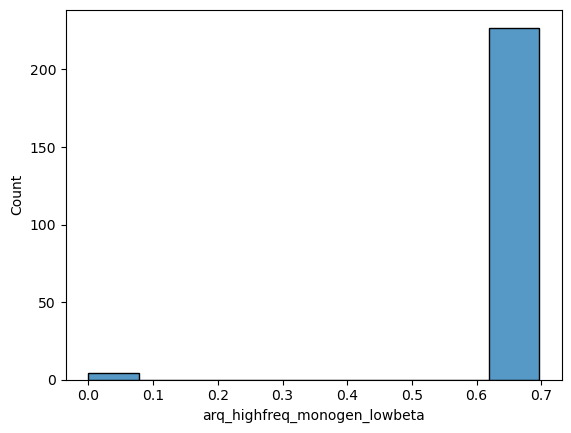

In [52]:
sns.histplot(all_pheno_df_og['arq_highfreq_monogen_lowbeta'])

<Axes: xlabel='arq_highfreq_monogen_highbeta', ylabel='Count'>

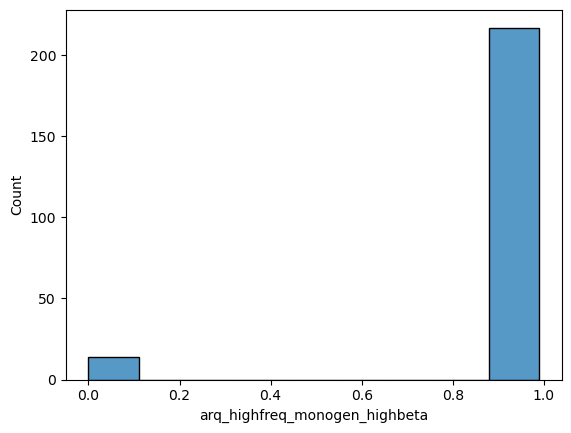

In [53]:
sns.histplot(all_pheno_df_og['arq_highfreq_monogen_highbeta'])

<Axes: xlabel='arq_highfreq_monogen_lowbeta', ylabel='Count'>

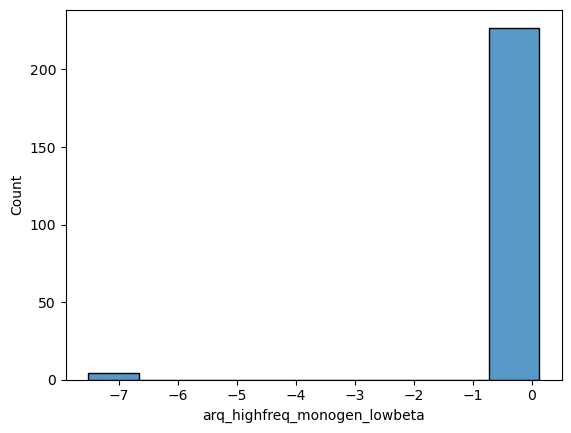

In [54]:
sns.histplot(st_all_pheno_og['arq_highfreq_monogen_lowbeta'])

<Axes: xlabel='arq_highfreq_monogen_highbeta', ylabel='Count'>

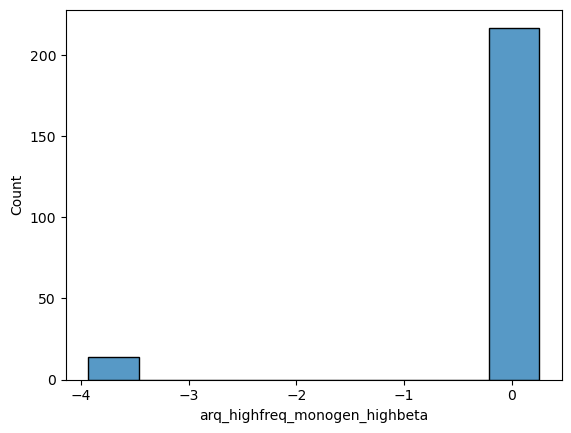

In [55]:
sns.histplot(st_all_pheno_og['arq_highfreq_monogen_highbeta'])

<Figure size 2000x2000 with 0 Axes>

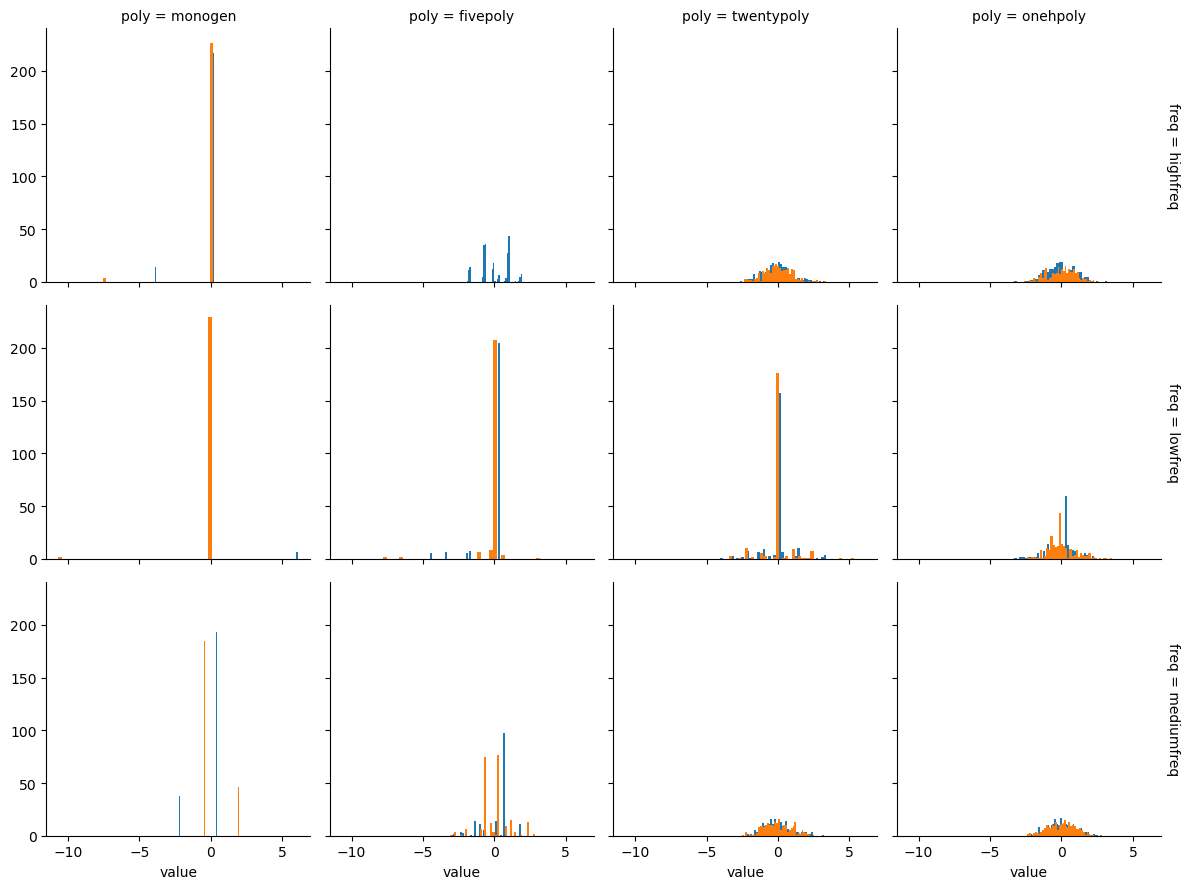

In [57]:
st_all_pheno = st_all_pheno_og.T.reset_index()
st_all_pheno['freq'] = st_all_pheno['index'].str.split('_').str[1]
st_all_pheno['beta'] = st_all_pheno['index'].str.split('_').str[-1]
st_all_pheno['poly'] = st_all_pheno['index'].str.split('_').str[2]
st_all_pheno = st_all_pheno.pivot_table(columns = ['beta','freq', 'poly'],values=st_all_pheno.columns[1:-3])
st_all_pheno = st_all_pheno.melt()

# Define the desired order for rows and columns
row_order = ['lowbeta', 'highbeta']
col_order = ['monogen', 'fivepoly', 'twentypoly', 'onehpoly']

plt.figure(figsize=(20, 20)) 
# Create a grid of subplots using seaborn
g = sns.FacetGrid(st_all_pheno, col='poly', row='freq',hue = 'beta',  margin_titles=True, col_order=col_order)
g.map(plt.hist, 'value', bins=40)

# Adjust layout
g.fig.tight_layout()

# Show the plot
plt.show()